# Speech Enhancement

The objectives of this notebook is:
* Applying low-pass, high-pass and band-pass filters for removing noise from speech signals
* Enhancing speech quality using spectral subtraction and Wiener filter
* Practising scipy.signal package

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from pydub.utils import mediainfo

noisy_speech = AudioSegment.from_wav('./resources/NoisySignal/Station/sp01_station_sn5.wav')
noisy_s = noisy_speech.get_array_of_samples() # samples x(t)
noisy_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

In this section I experimented with processing audio signals and applying various filtering techniques to noisy audio
files. This was completed using the Pydub and Librosa Python Libraries. I first read the sp01_station_sn5.wav from the
sample files provided using pydub.AudioSegment() method. From here I was able to plot the signal – *See image below*.

Text(0, 0.5, 'Amplitude')

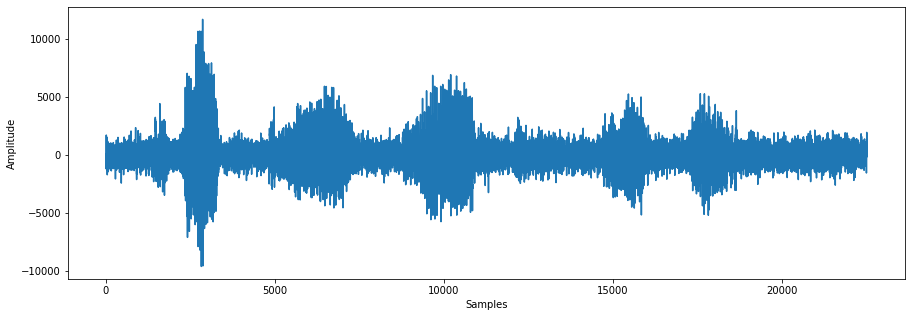

In [7]:
plt.figure(figsize = (15, 5))
plt.plot(noisy_s)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

I then applied a Fourier transform and plotted the spectrogram

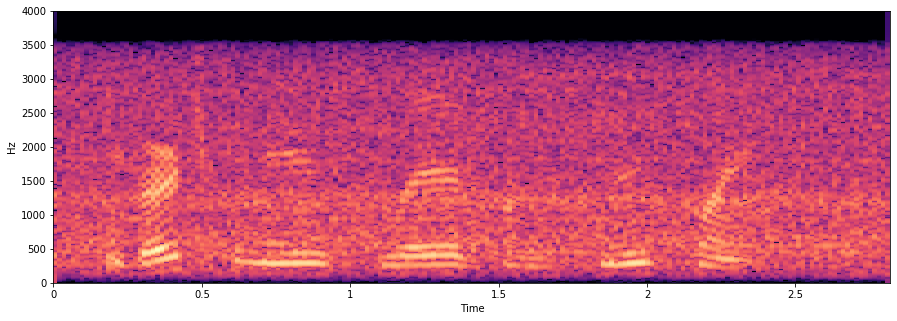

In [8]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'
noisy_S = librosa.stft(np.float32(noisy_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(noisy_Sdb,
                         sr = noisy_f,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)

## Applying Filters

In this section I applied various Filters (Low Pass, High Pass and Band Pass) using a Butterworth filter from the
scipy.signal library.

In [9]:
from scipy import signal

#order
order = 10

#sampling frequency
sampling_freq = noisy_f

#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 1000

#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'lowpass'

#filter
h = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

In [10]:
filtered_s = signal.sosfilt(h, noisy_s)

In [11]:
import array
import pydub
from pydub import AudioSegment

filtered_s_audio = pydub.AudioSegment(data = array.array(noisy_speech.array_type, np.float16(filtered_s)),
                                      sample_width = 2,
                                      frame_rate = noisy_f,
                                      channels = 1)

filtered_s_audio.export('sp01_station_sn5_lowpass.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_lowpass.wav'>

## Low Pass Filter

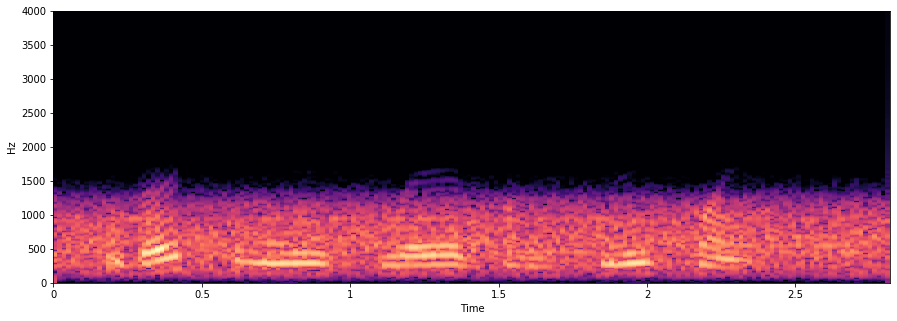

In [12]:
freq_range = 2048
win_length = int(noisy_f * 0.03)
hop_length = int(win_length / 2)


window = 'hann'
filtered_S = librosa.stft(np.float32(filtered_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))
filtered_Sdb = librosa.amplitude_to_db(abs(filtered_S))
librosa.display.specshow(filtered_Sdb,
                         sr = noisy_f,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.savefig('lowpass.png')

The low pass filter used a cut-off frequency of 1000Hz and order of 10. Image 3 shows the
spectrogram of the low pass filter where you can see the impact of the 1000Hz cut-off. I also saved the audio of the low
pass filter. Upon listening to this you can hear the speech is significantly more muffled.

## High Pass Filter

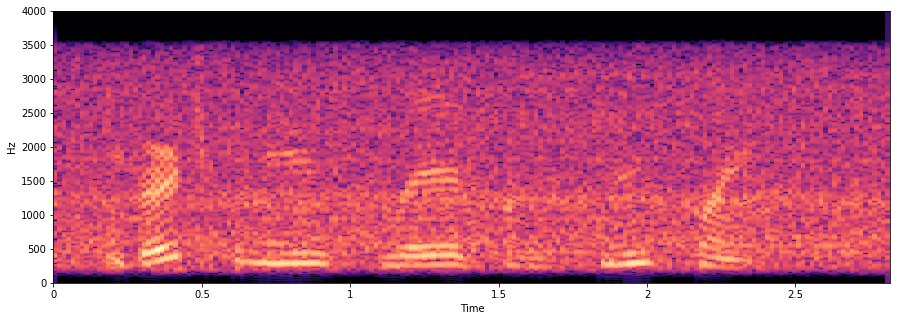

In [13]:
h = signal.butter(N = 10,
                  fs = noisy_f,
                  Wn = 200,
                  btype = 'highpass',
                  analog = False,
                  output = 'sos')

filtered_s = signal.sosfilt(h, noisy_s)

freq_range = 2048
win_length = int(noisy_f * 0.03)
hop_length = int(win_length / 2)

window = 'hann'
filtered_S = librosa.stft(np.float32(filtered_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))
filtered_Sdb = librosa.amplitude_to_db(abs(filtered_S))
librosa.display.specshow(filtered_Sdb,
                         sr = noisy_f,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.savefig('highpass.png')

The high pass filter was applied with a cut-off frequency of 200Hz and order of 10. This essentially keeps everything but
200Hz and below. You can see this visually in the spectrogram above.

## Band-Pass Filter

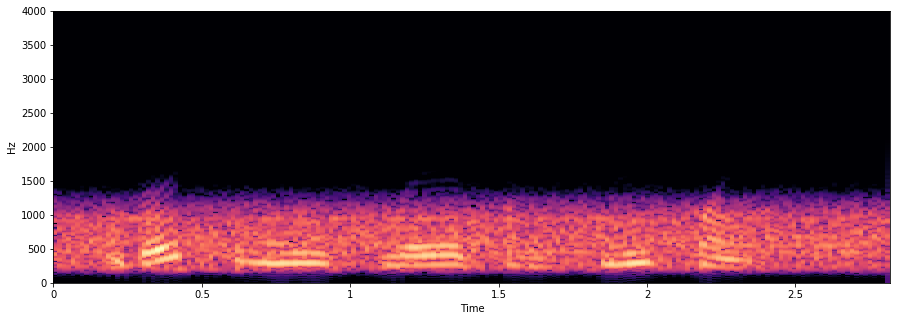

In [14]:
h = signal.butter(N = 10,
                  fs = noisy_f,
                  Wn =  [200,1000],
                  btype = 'bandpass',
                  analog = False,
                  output = 'sos')

filtered_s = signal.sosfilt(h, noisy_s)

freq_range = 2048
win_length = int(noisy_f * 0.03)
hop_length = int(win_length / 2)

window = 'hann'
filtered_S = librosa.stft(np.float32(filtered_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))
filtered_Sdb = librosa.amplitude_to_db(abs(filtered_S))
librosa.display.specshow(filtered_Sdb,
                         sr = noisy_f,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.savefig('bandpass.png')

The band pass filter was applied with a range of [200,1000]. This essentially keeps the signal between these
frequencies. You can visually see this in the spectrogram in image 5. It looks visually similar to the low pass filter
although there is minimal signal below the 200Hz range resulting in a thicker black area on the band pass spectrogram.

# 2. Noise Attenuation
In this section I experimented with Spectral Subtraction and Wiener filters for Noise Attenuation. The experimentation
was performed on several noisy audio files having either Babble or background noise from a train Station added. 

## 2.1 Spectral Subtraction

In this section I apply the spectral subtraction algorithm to infer the clean signal from the noise+speech signal and the
noise signal alone.

### Noisy speech -  Y and magnitude of Y

Take the audio file sp01_station_sn5.wav in NoisySignal/Station as an example. Let y be the speech signal
contained in sp01_station_sn5.wav, Y be the Fourier transforms of y, and mag_Y be the magnitude of Y (i.e.,
mag_Y = abs(Y)).

In [15]:
noisy_speech = AudioSegment.from_wav('./resources/NoisySignal/Station/sp01_station_sn5.wav')

y = noisy_speech.get_array_of_samples()
y_f = noisy_speech.frame_rate
win_length = int(y_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4

hop_length = int(win_length / 2)
Y = librosa.stft(np.float32(y),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)
mag_Y = abs(Y)

#### Noisy Signal - D and magnitude of D

Similarly, let d be the noise signal contained in Noise/Station/Station_1.wav. Let D be the Fourier transforms of
d, and mag_D be the magnitude of D. Note: in this example, we are working on “station” noise. Therefore,
Noise/Station/Station_1.wav is used. For other noise types, proper noise data should be used.

In [16]:
noisy_signal = AudioSegment.from_wav('./resources/Noise/Station/Station_1.wav')

d = noisy_signal.get_array_of_samples()
d_f = noisy_signal.frame_rate
win_length = int(d_f * 0.03)

#number of samples between two consecutive frames
#by default, hop_length = win_length / 4

hop_length = int(win_length / 2)
D = librosa.stft(np.float32(d),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)
mag_D = abs(D)

#### D hat

In [17]:
means_mag_D = np.mean(mag_D, axis = 1)

We then define the Fourier transform H as follows

In [18]:
H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H.shape[0]):
    for t in range(H.shape[1]):
        H[k][t] = np.sqrt(max(0, 1 - (means_mag_D[k] * means_mag_D[k]) / (mag_Y[k][t] * mag_Y[k][t])))

We estimate the Fourier transform S_hat as:

In [19]:
S_hat = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H.shape[0]):
    for t in range(H.shape[1]):
        S_hat[k][t] = H[k][t] * Y[k][t]

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


We then get the inverse of S_hat to retrieve s_hat.

In [20]:
win_length = int(y_f * 0.03)
hop_length = int(win_length / 2)
s_hat = librosa.istft(S_hat, win_length = win_length, hop_length = hop_length, length = len(y))

Finally, I save s_hat to file named sp01_station_sn5_spectralsubtraction.wav

In [21]:
s_hat_audio = pydub.AudioSegment(data = array.array(noisy_speech.array_type, np.float16(s_hat)),
                                 sample_width = 2,
                                 frame_rate = y_f,
                                 channels = 1)

s_hat_audio.export('sp01_station_sn5_spectralsubtraction.wav', format='wav')

<_io.BufferedRandom name='sp01_station_sn5_spectralsubtraction.wav'>

I can then plot the spectrogram of s_hat.

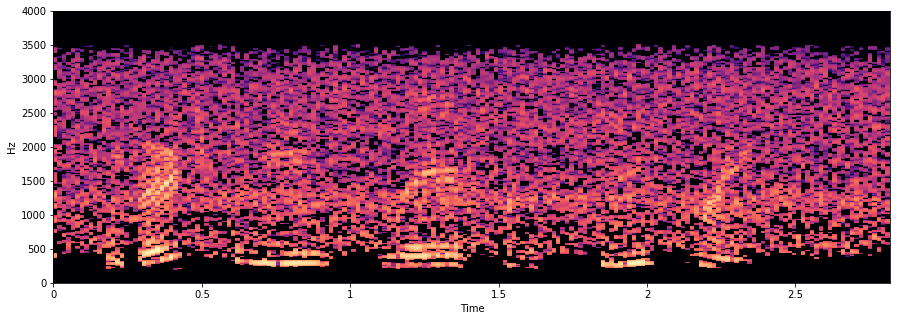

In [22]:
plt.figure(figsize = (15, 5))
s_hat_db = librosa.amplitude_to_db(abs(S_hat))
librosa.display.specshow(s_hat_db,
                         sr = y_f,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.savefig('sp01_station_sn5_spectralsubtraction_spectrogram.png')

Comare that to the spectrogram of the clear speech file.

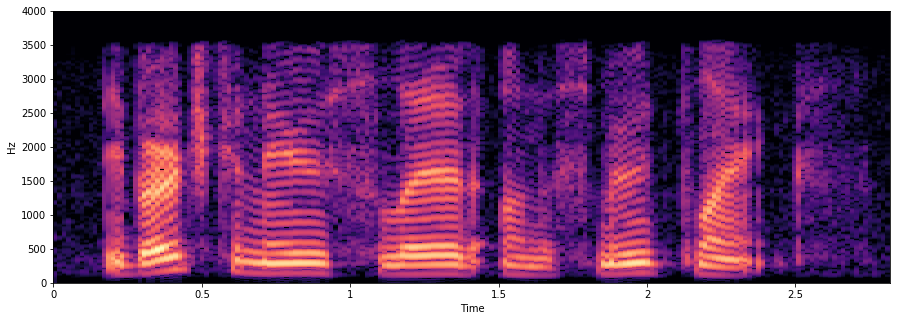

In [23]:
clean_speech = AudioSegment.from_wav('./resources/CleanSignal/sp01.wav')
clean_s = clean_speech.get_array_of_samples()
clean_f = clean_speech.frame_rate

freq_range = 2048
win_length = int(clean_f * 0.03)
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'
clean_S = librosa.stft(np.float32(clean_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 5))
clean_Sdb = librosa.amplitude_to_db(abs(clean_S))
librosa.display.specshow(clean_Sdb,
                         sr = clean_f,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.savefig('CleanSignal_sp01_spectrogram.png')

#### Testing on other files in NoiseSignal folder

To really compare the performance of the spectral subtraction algorithm I then apply it to all sample files provided.
For the Station signal samples, I use the Station noise to subtract and likewise for the Babble. I personally the station
signal files resulted in clearer audio even though there was still background static.

Visually the filtered signal spectrograms looked vastly different. The Babble version had a significant amount of
information removed via the filter but retained the key parts of the signal. This was consistent across all files.

In [33]:
def getSpec(audio_filename):
    filename = os.path.basename(audio_filename).split('.')[0]

    clean_speech = AudioSegment.from_wav(audio_filename)
    clean_s = clean_speech.get_array_of_samples()
    clean_f = clean_speech.frame_rate

    freq_range = 2048
    win_length = int(clean_f * 0.03)
    hop_length = int(win_length / 2)

    #windowing technique
    window = 'hann'
    clean_S = librosa.stft(np.float32(clean_s),
                           n_fft = freq_range,
                           window = window,
                           hop_length = hop_length,
                           win_length = win_length)

    plt.figure(figsize = (15, 5))
    clean_Sdb = librosa.amplitude_to_db(abs(clean_S))
    librosa.display.specshow(clean_Sdb,
                             sr = clean_f,
                             x_axis = 'time',
                             y_axis = 'linear',
                             hop_length = hop_length)
    plt.savefig(f'{filename}_spectrogram.png')

In [25]:
def runSpectralSubtraction(noisy_speech_file, noise_file):
    filename = os.path.basename(noisy_speech_file).split('.')[0]
    
    noisy_speech = AudioSegment.from_wav(noisy_speech_file)

    y = noisy_speech.get_array_of_samples()
    y_f = noisy_speech.frame_rate
    win_length = int(y_f * 0.03)

    hop_length = int(win_length / 2)
    Y = librosa.stft(np.float32(y),
                     n_fft = 2048,
                     window = 'hann',
                     hop_length = hop_length,
                     win_length = win_length)
    mag_Y = abs(Y)

    noisy_signal = AudioSegment.from_wav(noise_file)

    d = noisy_signal.get_array_of_samples()
    d_f = noisy_signal.frame_rate
    win_length = int(d_f * 0.03)

    hop_length = int(win_length / 2)
    D = librosa.stft(np.float32(d),
                     n_fft = 2048,
                     window = 'hann',
                     hop_length = hop_length,
                     win_length = win_length)
    mag_D = abs(D)

    means_mag_D = np.mean(mag_D, axis = 1)

    H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
    for k in range(H.shape[0]):
        for t in range(H.shape[1]):
            H[k][t] = max(0, 1 - (means_mag_D[k] * means_mag_D[k]) / (mag_Y[k][t] * mag_Y[k][t]))

    S_hat = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
    for k in range(H.shape[0]):
        for t in range(H.shape[1]):
            S_hat[k][t] = H[k][t] * Y[k][t]

    win_length = int(y_f * 0.03)
    hop_length = int(win_length / 2)
    s_hat = librosa.istft(S_hat, win_length = win_length, hop_length = hop_length, length = len(y))

    s_hat_audio = pydub.AudioSegment(data = array.array(noisy_speech.array_type, np.float16(s_hat)),
                                     sample_width = 2,
                                     frame_rate = y_f,
                                     channels = 1)

    s_hat_audio.export(f'{filename}_spectral_subtraction.wav', format='wav')

    plt.figure(figsize = (15, 5))
    s_hat_db = librosa.amplitude_to_db(abs(S_hat))
    librosa.display.specshow(s_hat_db,
                             sr = y_f,
                             x_axis = 'time',
                             y_axis = 'linear',
                             hop_length = hop_length)
    plt.savefig(f'{filename}_spectral_subtraction_spectrogram.png')

In [26]:
import os

In [34]:
signal_path = './resources/NoisySignal/Station/'
noise_path = './resources/NoisySignal/Babble/'
clean_path = './resources/CleanSignal/'

clean_file_names = [os.path.join(clean_path, f) for f in os.listdir(clean_path)]

station_file_names = [os.path.join(signal_path, f) for f in os.listdir(signal_path)]
    
babble_file_names = [os.path.join(noise_path, f) for f in os.listdir(noise_path)]

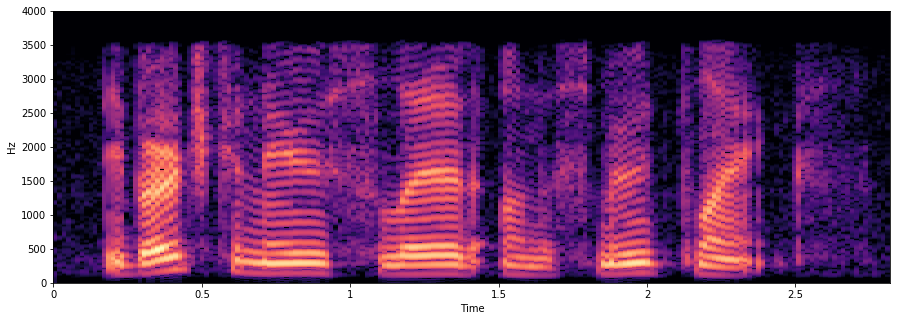

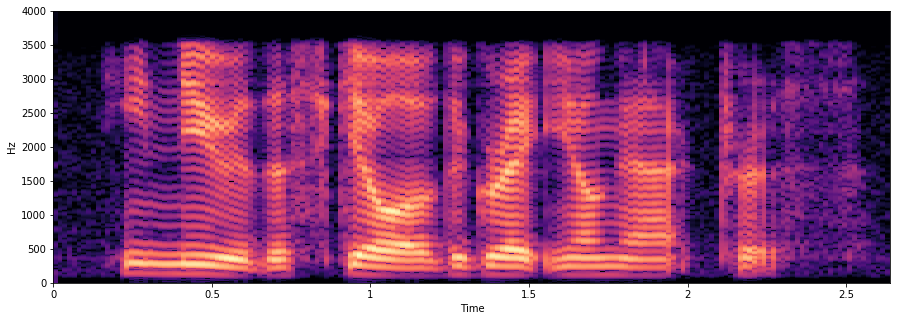

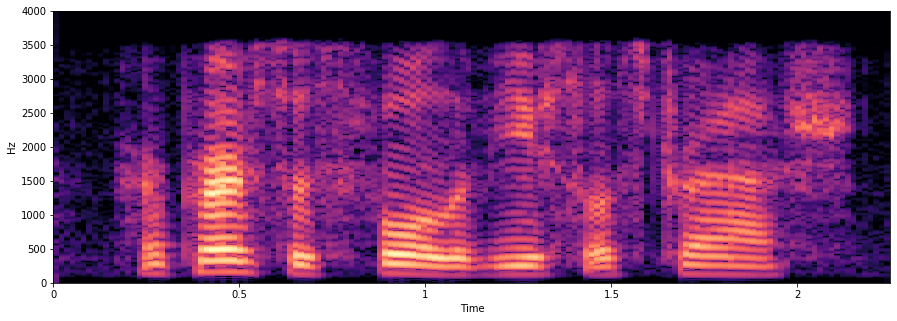

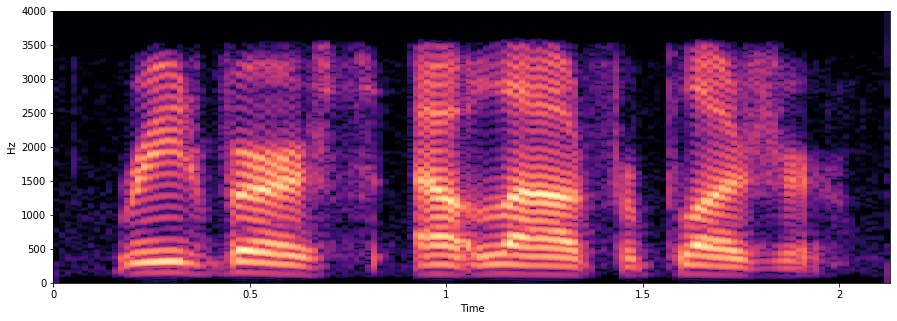

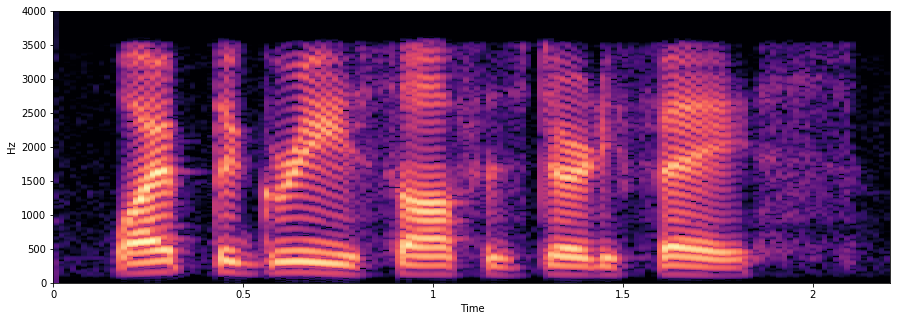

In [37]:
for f in clean_file_names:
        getSpec(f)

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


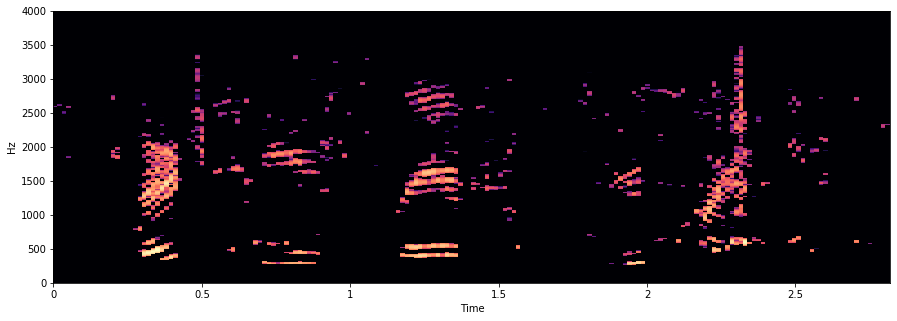

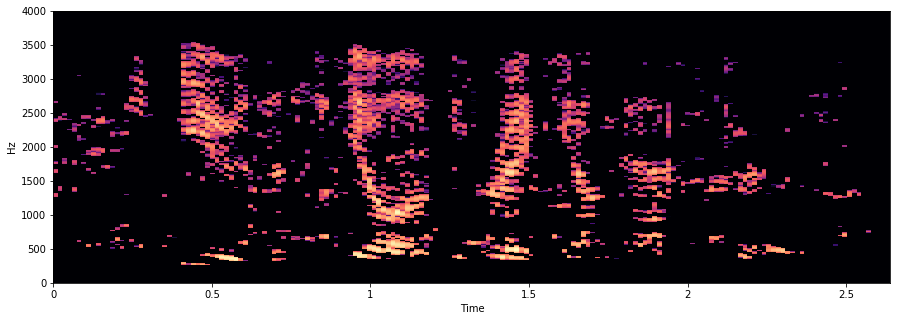

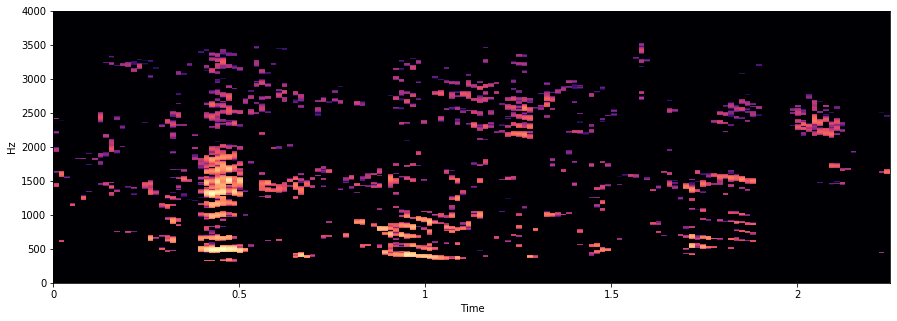

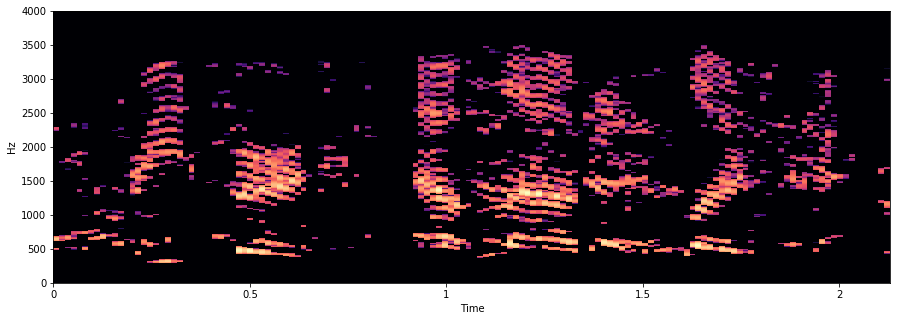

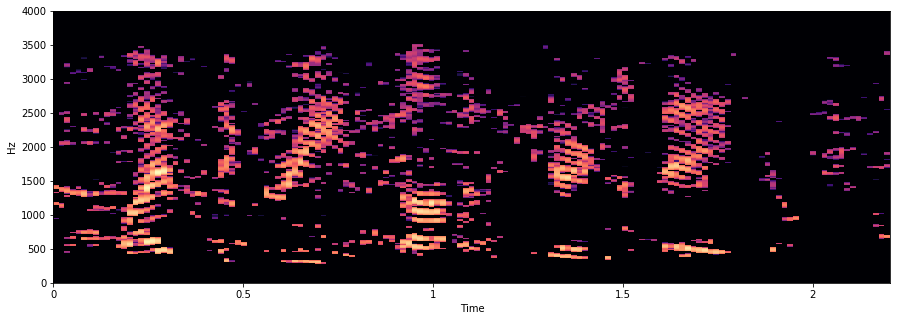

In [132]:
for s in babble_file_names:
        runSpectralSubtraction(s,'./Resources_7.2/Noise/Babble/Babble_1.wav')

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


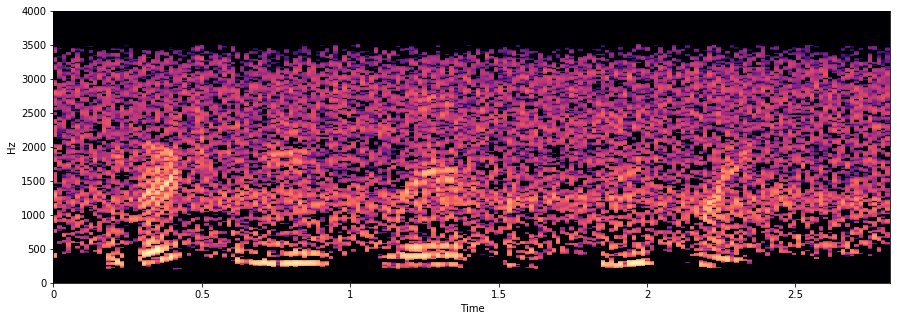

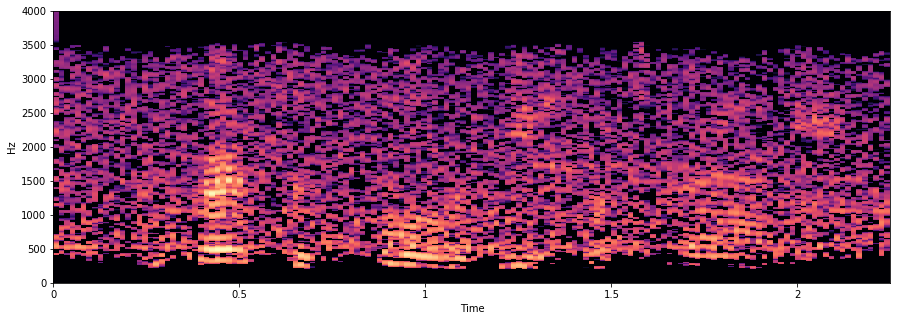

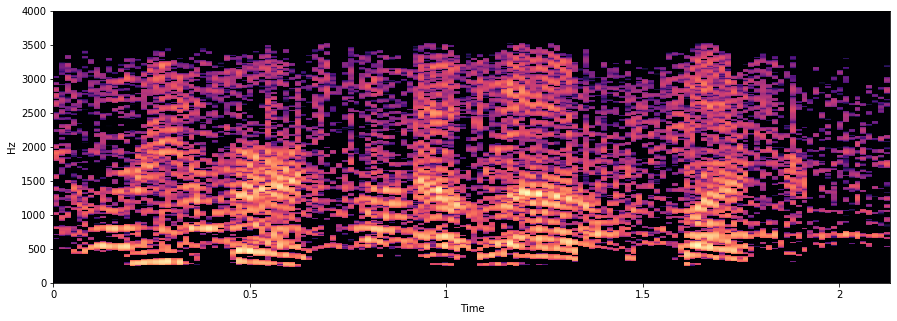

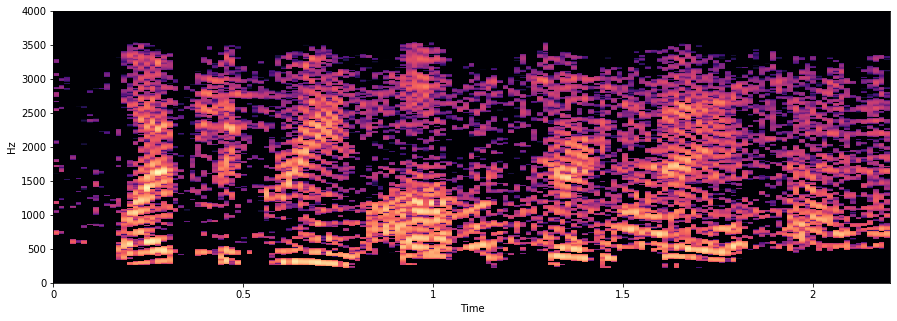

In [138]:
for s in station_file_names:
        runSpectralSubtraction(s,'./Resources_7.2/Noise/Station/Station_1.wav')

## 2.2 Wiener Filter

In this section I applied the Wiener filter algorithm to infer a clean signal from the noise+speech signal and the noise
signal alone. The resulting signal was written to a file for auditory comparison. Like the spectral subtraction, the
resulting audio was a fair deal clearer and you can tell that majority of the noise had been removed.

Overall, the visual and auditory differences were extremely subtle between spectral subtraction and wiener filtering for the sp01_station_sn5.wav file.

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


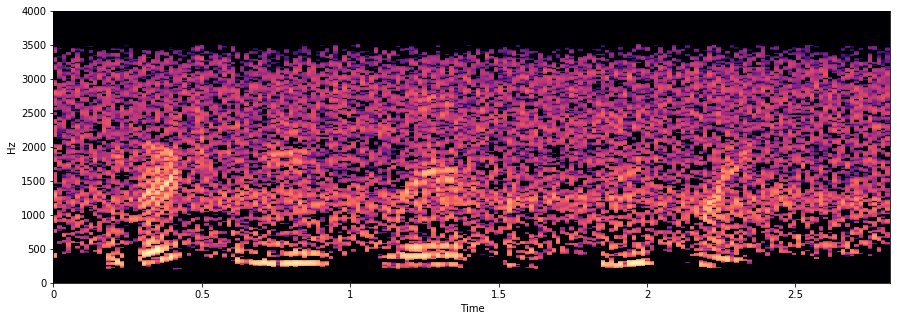

In [58]:
H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H.shape[0]):
    for t in range(H.shape[1]):
        H[k][t] = max(0, 1 - (means_mag_D[k] * means_mag_D[k]) / (mag_Y[k][t] * mag_Y[k][t]))
        
S_hat = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H.shape[0]):
    for t in range(H.shape[1]):
        S_hat[k][t] = H[k][t] * Y[k][t]
        
win_length = int(y_f * 0.03)
hop_length = int(win_length / 2)
s_hat = librosa.istft(S_hat, win_length = win_length, hop_length = hop_length, length = len(y))

s_hat_audio = pydub.AudioSegment(data = array.array(noisy_speech.array_type, np.float16(s_hat)),
                                 sample_width = 2,
                                 frame_rate = y_f,
                                 channels = 1)

s_hat_audio.export('sp01_station_sn5_wiener_filter.wav', format='wav')

plt.figure(figsize = (15, 5))
s_hat_db = librosa.amplitude_to_db(abs(S_hat))
librosa.display.specshow(s_hat_db,
                         sr = y_f,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.savefig('sp01_station_sn5_wiener_filter_spectrogram.png')

In [157]:
def runWienerFilter(noisy_speech_file, noise_file):
    filename = os.path.basename(noisy_speech_file).split('.')[0]
    
    noisy_speech = AudioSegment.from_wav(noisy_speech_file)

    y = noisy_speech.get_array_of_samples()
    y_f = noisy_speech.frame_rate
    win_length = int(y_f * 0.03)

    hop_length = int(win_length / 2)
    Y = librosa.stft(np.float32(y),
                     n_fft = 2048,
                     window = 'hann',
                     hop_length = hop_length,
                     win_length = win_length)
    mag_Y = abs(Y)

    noisy_signal = AudioSegment.from_wav(noise_file)

    d = noisy_signal.get_array_of_samples()
    d_f = noisy_signal.frame_rate
    win_length = int(d_f * 0.03)

    hop_length = int(win_length / 2)
    D = librosa.stft(np.float32(d),
                     n_fft = 2048,
                     window = 'hann',
                     hop_length = hop_length,
                     win_length = win_length)
    mag_D = abs(D)

    means_mag_D = np.mean(mag_D, axis = 1)

    H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
    for k in range(H.shape[0]):
        for t in range(H.shape[1]):
            H[k][t] = np.sqrt(max(0, 1 - (means_mag_D[k] * means_mag_D[k]) / (mag_Y[k][t] * mag_Y[k][t])))

    S_hat = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
    for k in range(H.shape[0]):
        for t in range(H.shape[1]):
            S_hat[k][t] = H[k][t] * Y[k][t]

    win_length = int(y_f * 0.03)
    hop_length = int(win_length / 2)
    s_hat = librosa.istft(S_hat, win_length = win_length, hop_length = hop_length, length = len(y))

    s_hat_audio = pydub.AudioSegment(data = array.array(noisy_speech.array_type, np.float16(s_hat)),
                                     sample_width = 2,
                                     frame_rate = y_f,
                                     channels = 1)

    s_hat_audio.export(f'{filename}_wierner.wav', format='wav')

    plt.figure(figsize = (15, 5))
    s_hat_db = librosa.amplitude_to_db(abs(S_hat))
    librosa.display.specshow(s_hat_db,
                             sr = y_f,
                             x_axis = 'time',
                             y_axis = 'linear',
                             hop_length = hop_length)
    plt.savefig(f'{filename}_wiener_spectrogram.png')

I again applied the Wiener filter to all audio files supplied. The results were similar to those obtained by the spectral
subtraction. The babble files again had significantly more information removed in the filter.

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


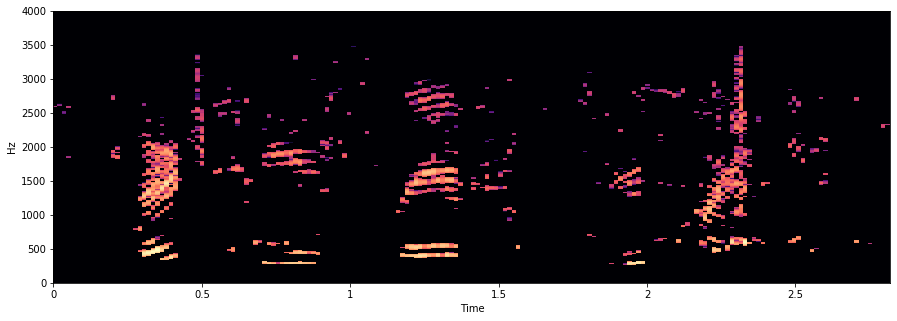

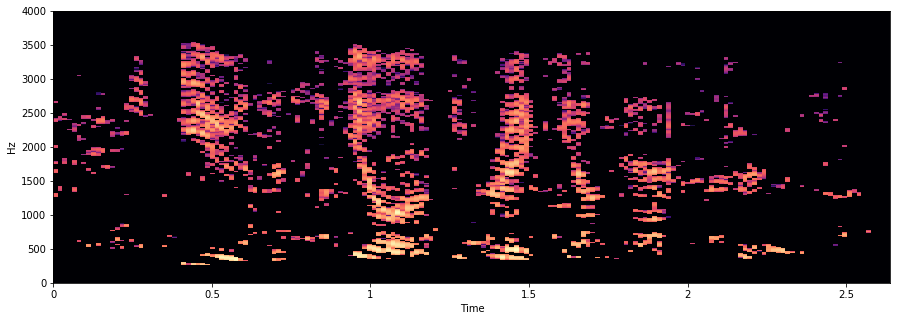

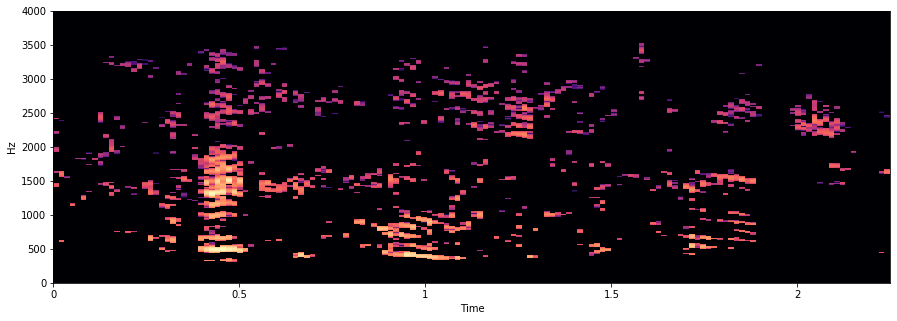

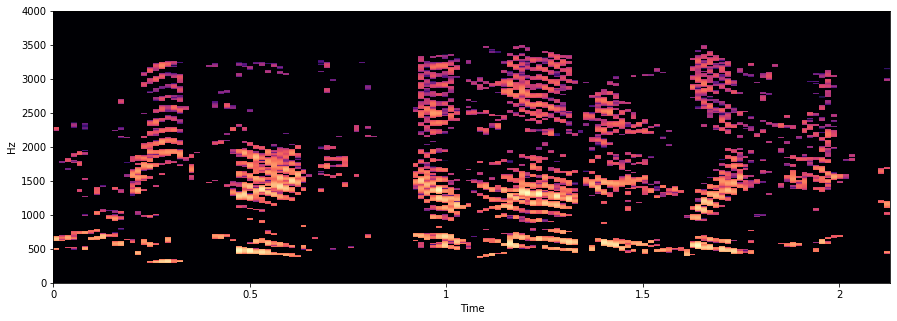

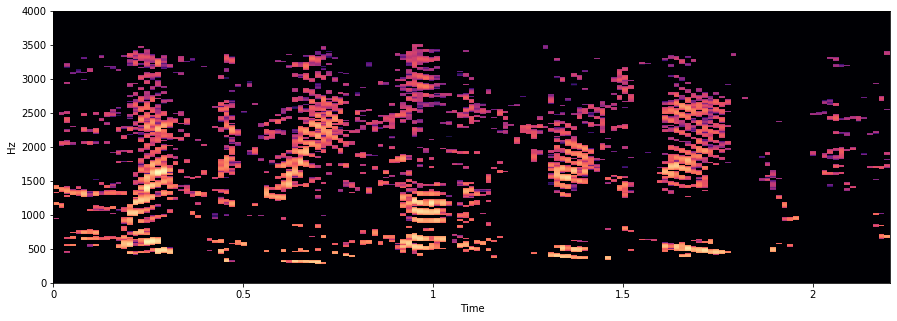

In [158]:
for s in babble_file_names:
        runWienerFilter(s,'./resources/Noise/Babble/Babble_1.wav')

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


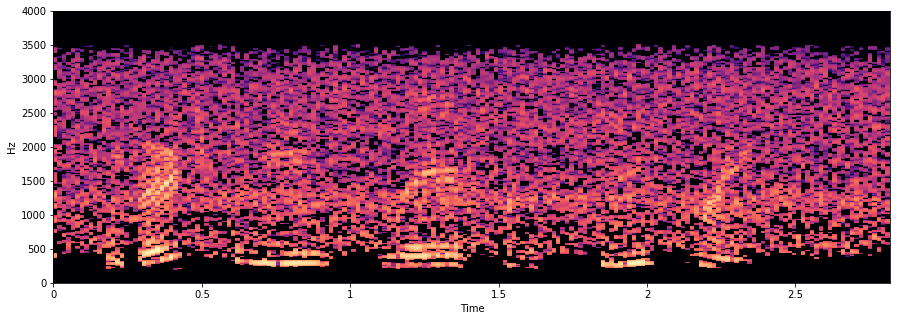

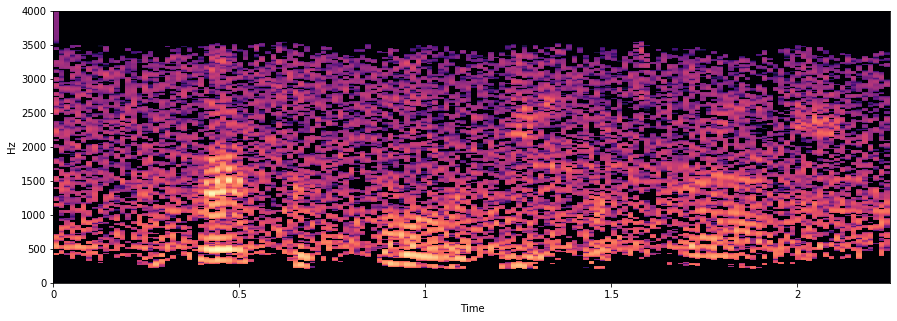

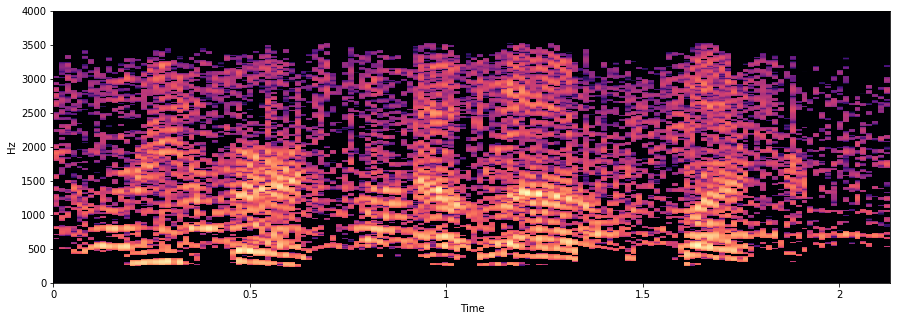

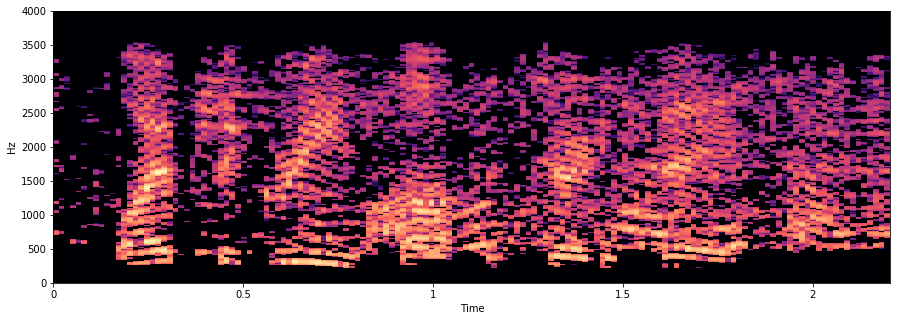

In [160]:
for s in station_file_names:
        runWienerFilter(s,'./resources/Noise/Station/Station_1.wav')

The differences are incredibly subtle and difficult to discern. I listened to the audio files of each several times to try and pick the differences, but I cannot say that I could pick anything remarkably different in the short audio clips.